In [1]:
import os
os.chdir('/engram/nklab/hossein/recurrent_models/transformer_brain_encoder/')
!pwd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import torch
# import torchvision.transforms as T
from PIL import Image
import torchvision.transforms as transforms
from datasets.nsd import fetch_dataloaders

from brain_encoder_wrapper import brain_encoder_wrapper


/engram/nklab/hossein/recurrent_models/transformer_brain_encoder


In [2]:
#qargs = ['dinov2_q_transformer', 'dinov2_q_last', 'rois_all', 1, 0]
subj=1
readout_res= 'rois_all'
enc_output_layer=[1]
runs=[1]

model = brain_encoder_wrapper(subj=subj, readout_res=readout_res, enc_output_layer=enc_output_layer, runs=runs)

#print all roi names
print(list(model.lh_roi_names))

Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


['V1v', 'V1d', 'V2v', 'V2d', 'V3v', 'V3d', 'hV4', 'EBA', 'FBA-1', 'FBA-2', 'mTL-bodies', 'OFA', 'FFA-1', 'FFA-2', 'mTL-faces', 'aTL-faces', 'OPA', 'PPA', 'RSC', 'OWFA', 'VWFA-1', 'VWFA-2', 'mfs-words', 'mTL-words']


torch.Size([3, 425, 425])
torch.Size([3, 434, 434])


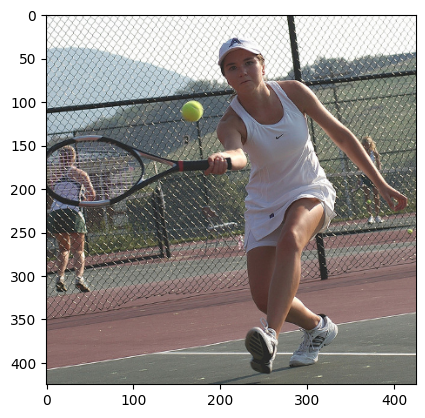

In [3]:

preprocess = transforms.Compose([
             transforms.ToTensor(),
             transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

train_img_dir  = os.path.join(model.data_dir, 'training_split', 'training_images')
image_path = train_img_dir + '/train-9039_nsd-66847.png'
image = Image.open(image_path)
plt.imshow(image)
img = preprocess(image)
print(img.shape)
patch_size = 14

size_im = (
    img.shape[0],
    int(np.ceil(img.shape[1] / patch_size) * patch_size),
    int(np.ceil(img.shape[2] / patch_size) * patch_size),
)
paded = torch.zeros(size_im)
paded[:, : img.shape[1], : img.shape[2]] = img
img = paded
print(paded.shape)
imgs = img[None, :,:,:]

h = img.shape[-2] // patch_size
w = img.shape[-1] // patch_size

# train_loader, val_loader = fetch_nsd_dataloader(args, args.batch_size, train='train')
# test_loader = fetch_nsd_dataloader(args, args.batch_size, train='test')

In [4]:
outputs = model.forward(imgs)

print(outputs)
#del outputs

# model.model.zero_grad()
# torch.cuda.empty_cache()
# 
#rois_acts = np.sum(outputs[0] * lh_challenge_rois) + np.sum(outputs[1] * rh_challenge_rois)

(tensor([[-0.2068, -0.0568, -0.5192,  ..., -0.4307, -0.3878, -0.2356]],
       device='cuda:0', grad_fn=<SumBackward1>), tensor([[ 0.0413, -0.0178,  1.4162,  ...,  0.0270, -0.0694, -0.2016]],
       device='cuda:0', grad_fn=<SumBackward1>))


In [5]:
#qargs = ['dinov2_q_transformer', 'dinov2_q_last', 'rois_all', 1, 0]
subj=1
readout_res= 'rois_all'
enc_output_layer=[1, 3, 5, 7]
runs= np.arange(1, 11) #[1, 2]

model = brain_encoder_wrapper(subj=subj, readout_res=readout_res, enc_output_layer=enc_output_layer, runs=runs)


Run 1 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 1 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 2 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 3 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 4 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 1 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 3 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 5 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 5 Backbone Layer 7 Device cuda:0


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 6 Backbone Layer 1 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 6 Backbone Layer 3 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 6 Backbone Layer 5 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 6 Backbone Layer 7 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 7 Backbone Layer 1 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 7 Backbone Layer 3 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 7 Backbone Layer 5 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 7 Backbone Layer 7 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 8 Backbone Layer 1 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 8 Backbone Layer 3 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 8 Backbone Layer 5 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 8 Backbone Layer 7 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 9 Backbone Layer 1 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 9 Backbone Layer 3 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 9 Backbone Layer 5 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 9 Backbone Layer 7 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 10 Backbone Layer 1 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 10 Backbone Layer 3 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 10 Backbone Layer 5 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


Run 10 Backbone Layer 7 Device cuda:1


Using cache found in /home/ha2366/.cache/torch/hub/facebookresearch_dinov2_main


lh_corr_sm (4, 19004)
lh_corr_sm torch.Size([40, 19004])


In [6]:
outputs = model.forward(imgs)
print(outputs[0].shape)
del outputs

torch.Size([1, 19004])


Find images in the test set that have the highest activations in the rois

In [7]:
class model_argObj:
    def __init__(self):

        self.data_dir = '/engram/nklab/algonauts/algonauts_2023_challenge_data/'
        self.backbone_arch = 'dinov2_q'
        self.train  = 'test'
        self.batch_size = 32
        self.image_size = None
        self.saved_feats = None
        self.saved_feats_dir = ''


args = model_argObj()

subj = 1
args.subj = format(subj, '02')
args.data_dir = os.path.join(args.data_dir, 'subj'+args.subj)

test_loader = fetch_dataloaders(args, train='test')
images = next(iter(test_loader))

images.shape


Test stimulus images: 159


torch.Size([32, 3, 434, 434])

In [8]:
outputs = model.forward(images)
outputs = [o.detach().cpu().numpy() for o in outputs]

In [15]:
# list of rois to maximize activations
rois_list = ['OFA', 'FFA-1', 'FFA-2']

lh_challenge_rois = []
rh_challenge_rois = []

for roi in rois_list:
    roi_ind = model.lh_roi_names.index(roi)
    lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
    rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])

lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()

rois_acts = np.sum(outputs[0] * lh_challenge_rois, axis=1) + np.sum(outputs[1] * rh_challenge_rois, axis=1)
rois_acts.shape
#fig = plot_on_brain(lh_challenge_rois, rh_challenge_rois)

(32,)

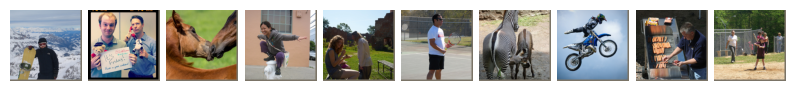

In [16]:
mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Convert the tensor to a PIL Image
    to_pil = transforms.ToPILImage()
    image = to_pil(inv_normalize(tensor))

    return image


rois_acts_inds = np.argsort(rois_acts)
# all_corrs = all_corrs[all_corrs_inds]

top_n = 10

fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 10)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i in range(0,top_n):
    img = images[rois_acts_inds[-(i+1)]]
    ax = plt.subplot(gs[i//10,i % 10])
    ax.imshow(denormalize(img))
    ax.axis("off")

plt.show()

In [11]:
rois_acts_inds

array([13,  3, 27, 30,  8, 21, 26, 19,  2,  5, 17, 14, 29, 16,  1, 31,  9,
       15,  4, 10, 12, 25,  6, 23,  0, 24, 22, 11, 18, 20,  7, 28])

In [11]:
model_features = model.attention(images)

dec_attn_weights_batch = np.array(model_features['dec_attn_weights'])

In [12]:
dec_attn_weights = dec_attn_weights_batch.mean(0)
h, w = 31, 31
dec_attn_weights = dec_attn_weights.reshape(-1,50,h, w)
dec_attn_weights.shape

(32, 50, 31, 31)

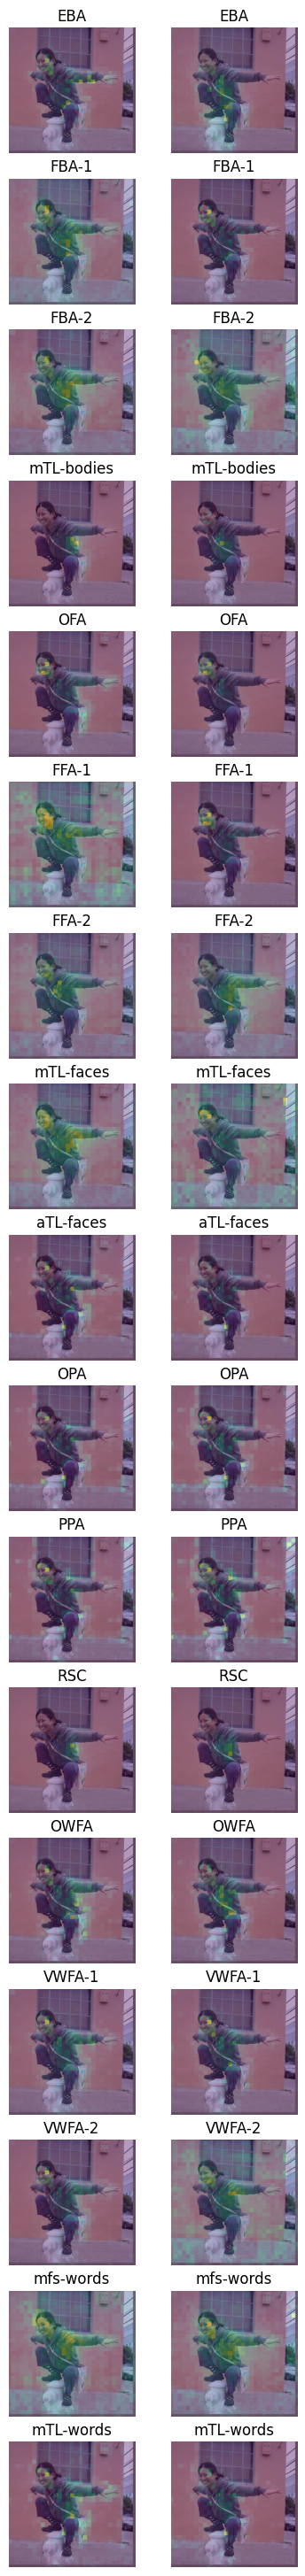

In [44]:


#plt.imshow(dec_attn_weights[0][1])
im_ind = 18

import torch
import torchvision.transforms as transforms
import scipy

mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor, mean, std):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Apply the inverse transform
    return inv_normalize(tensor)


# Denormalize the tensor
denormalized_tensor = denormalize(images[im_ind], mean, std)
# Convert the tensor to a PIL Image
to_pil = transforms.ToPILImage()
image = to_pil(denormalized_tensor)

fig = plt.figure(figsize= (4.5, (2.29*(model.lh_challenge_rois.shape[0]-1))))
# and we add one plot per reference point
gs = fig.add_gridspec(model.lh_challenge_rois.shape[0], 2)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

for i in range(2):
    for j in range(8,len(model.lh_roi_names)+1):
        ax = plt.subplot(gs[j-1, i])
        att_map = dec_attn_weights[im_ind][(i*25) + j]
        att_map = scipy.ndimage.zoom(att_map, [14,14], order=0, mode='wrap')

        im1 = plt.imshow(image)
        im2 = plt.imshow(att_map, cmap=plt.cm.viridis, alpha=.4, interpolation='bilinear')

        #ax.imshow(np.array(image) + att_map)
        #ax.imshow(dec_attn_weights[im_ind][(i*25) + j])
        plt.axis('off')
        if i == 0:
            ax.set_title(model.lh_roi_names[j-1])
        elif i == 1:
            ax.set_title(model.rh_roi_names[j-1])
#fig.savefig("../figures/faces.png", bbox_inches='tight', dpi=300)

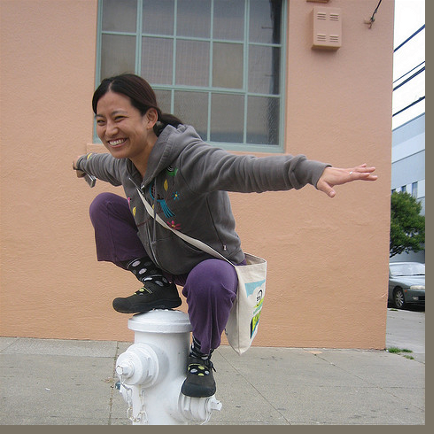

In [15]:

image

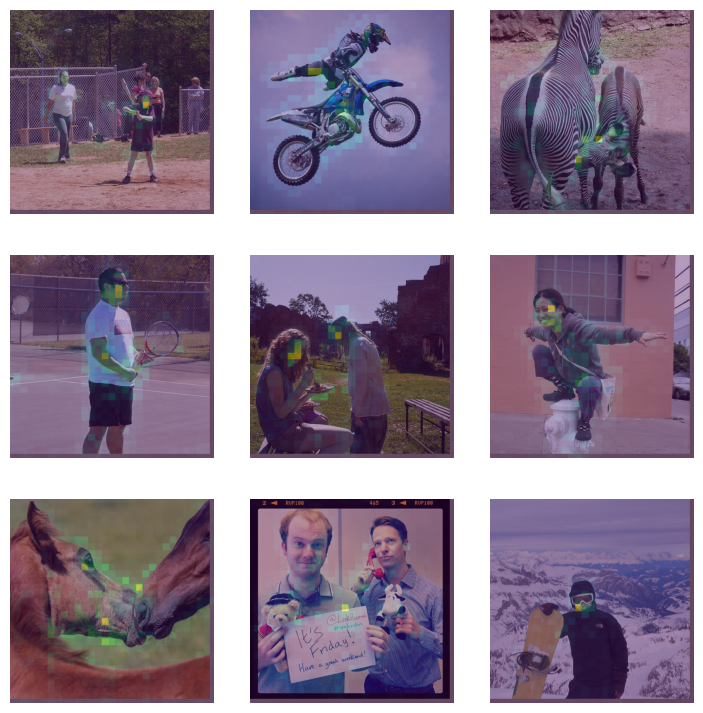

In [22]:


#plt.imshow(dec_attn_weights[0][1])
im_ind = 18

import torch
import torchvision.transforms as transforms
import scipy

mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor, mean, std):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Apply the inverse transform
    return inv_normalize(tensor)


# Denormalize the tensor


fig = plt.figure(figsize= (9, 9))
# and we add one plot per reference point
gs = fig.add_gridspec(3, 3)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

i  = 1 #in range(2):
j = 9
imgs = rois_acts_inds[[-10, -8, -7, -6, -5, -4, -3, -2, -1]]
for r in range(3):
    for c in range(3):
        ax = plt.subplot(gs[r, c])
        im_ind = imgs[r*3 + c]
        att_map = dec_attn_weights[im_ind][(i*25) + j]
        att_map = scipy.ndimage.zoom(att_map, [14,14], order=0, mode='wrap')

        denormalized_tensor = denormalize(images[im_ind], mean, std)
        # Convert the tensor to a PIL Image
        to_pil = transforms.ToPILImage()
        image = to_pil(denormalized_tensor)
        ax.imshow(image)
        ax.imshow(att_map, cmap=plt.cm.viridis, alpha=.4, interpolation='bilinear')
        ax.axis('off')

#fig.savefig("images/FBA1_rh.png", bbox_inches='tight', dpi=300)

In [25]:
rois_acts_inds[-9:]

array([23,  0, 24, 22, 11, 18, 20,  7, 28])

In [ ]:
model_features = model.attention(imgs)

dec_attn_weights_batch = np.array(model_features['dec_attn_weights'])

In [ ]:
dec_attn_weights = dec_attn_weights_batch.mean(0)
h, w = 31, 31
dec_attn_weights = dec_attn_weights.reshape(-1,h, w)
dec_attn_weights.shape

(39548, 31, 31)

In [ ]:
# list of rois to maximize activations
rois_list = ['FFA-1'] #, 'FFA-1', 'FFA-2']

lh_challenge_rois = []
rh_challenge_rois = []

for roi in rois_list:
    roi_ind = model.lh_roi_names.index(roi)
    lh_challenge_rois.append(model.lh_challenge_rois[roi_ind]) 
    rh_challenge_rois.append(model.rh_challenge_rois[roi_ind])

# lh_challenge_rois = torch.clip(torch.stack(lh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()
# rh_challenge_rois = torch.clip(torch.stack(rh_challenge_rois).sum(0), min=0, max=1).cpu().numpy()

#fig = plot_on_brain(lh_challenge_rois, rh_challenge_rois)

In [ ]:
inds = np.where(torch.stack(lh_challenge_rois)[0])[0]

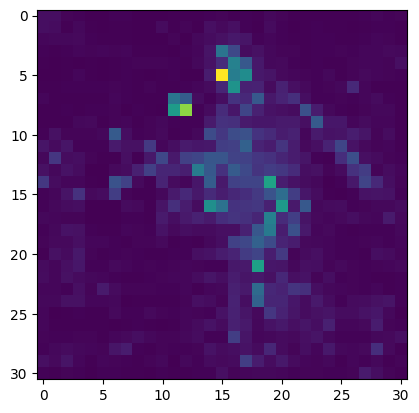

In [ ]:
att_map = dec_attn_weights[inds].mean(0)
plt.imshow(att_map)

In [ ]:
rois_list

['FFA-1']

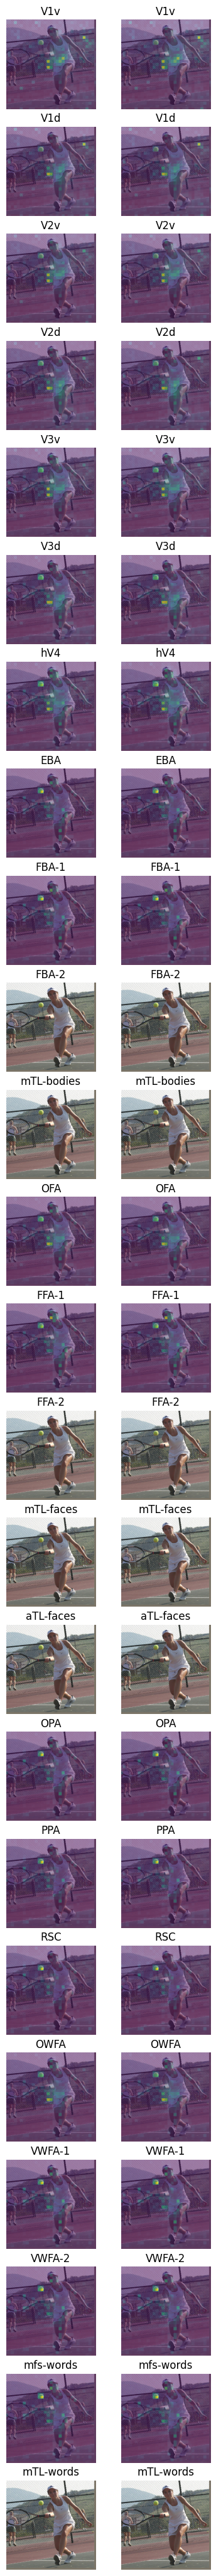

In [ ]:


#plt.imshow(dec_attn_weights[0][1])
im_ind = 0

import torch
import torchvision.transforms as transforms
import scipy

mean = [0.485, 0.456, 0.406]  # Mean used for normalization
std = [0.229, 0.224, 0.225]  # Standard deviation used for normalization

def denormalize(tensor, mean, std):
    """Denormalizes a tensor image."""
    # Create an inverse transform
    inv_normalize = transforms.Normalize(
        mean=[-m / s for m, s in zip(mean, std)],
        std=[1 / s for s in std]
    )

    # Apply the inverse transform
    return inv_normalize(tensor)


# Denormalize the tensor
denormalized_tensor = denormalize(imgs[im_ind], mean, std)
# Convert the tensor to a PIL Image
to_pil = transforms.ToPILImage()
image = to_pil(denormalized_tensor)

fig = plt.figure(figsize= (4.5, (2.29*(model.lh_challenge_rois.shape[0]-1))))
# and we add one plot per reference point
gs = fig.add_gridspec(model.lh_challenge_rois.shape[0], 2)
fig.subplots_adjust(wspace=0.1, hspace=0.2)

for i in range(2):
    for j in range(1,len(model.lh_roi_names)+1):

        roi_ind = j-1 #model.lh_roi_names.index(rois_list[j-1])
        lh_challenge_rois = model.lh_challenge_rois[roi_ind]
        rh_challenge_rois = model.rh_challenge_rois[roi_ind]

        inds = np.where(lh_challenge_rois)[0]
        att_map = dec_attn_weights[inds].mean(0)
        # att_map = dec_attn_weights[im_ind][(i*25) + j]
        
        ax = plt.subplot(gs[j-1, i])

        att_map = scipy.ndimage.zoom(att_map, [14,14], order=0, mode='wrap')

        im1 = plt.imshow(image)
        im2 = plt.imshow(att_map, cmap=plt.cm.viridis, alpha=.5, interpolation='bilinear')

        #ax.imshow(np.array(image) + att_map)
        #ax.imshow(dec_attn_weights[im_ind][(i*25) + j])
        plt.axis('off')
        if i == 0:
            ax.set_title(model.lh_roi_names[j-1])
        elif i == 1:
            ax.set_title(model.rh_roi_names[j-1])
#fig.savefig("../figures/faces.png", bbox_inches='tight', dpi=300)

In [ ]:
train_img_dir  = os.path.join(model.data_dir, 'training_split', 'training_images')
image_path = train_img_dir + '/train-9039_nsd-66847.png'
img = Image.open(image_path)


In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

# Load model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

im_ind = 18
denormalized_tensor = denormalize(images[im_ind], mean, std)
# Convert the tensor to a PIL Image
to_pil = transforms.ToPILImage()
image = to_pil(denormalized_tensor)
# # Load image
# img = Image.open(requests.get("https://example.com/image.jpg", stream=True).raw)

# Generate caption
inputs = processor(img, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)
print(caption)


ValueError: The image to be converted to a PIL image contains values outside the range [0, 1], got [-2.1179039478302, 2.640000104904175] which cannot be converted to uint8.

In [52]:

import os
import json
from PIL import Image
from tqdm import tqdm
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

root_dir =  '/engram/nklab/algonauts/algonauts_2023_challenge_data/' 
test_img_dir  = os.path.join(root_dir, 'subj08', 'training_split', 'training_images')

output_file = os.path.join(root_dir, 'subj08', 'training_split', 'captions_by_index.json')

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

captions = []
filename_to_index = {}

test_img_list = os.listdir(test_img_dir)
test_img_list = [f for f in test_img_list if f.endswith('.png')]
test_img_list.sort()

for idx, filename in enumerate(tqdm(test_img_list)):
    image_path = os.path.join(test_img_dir, filename)
    image = Image.open(image_path).convert("RGB")

    inputs = processor(image, return_tensors="pt").to(device)
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)

    #print(f"Caption for {filename}: {caption}")

    captions.append(caption)
    filename_to_index[filename] = idx
    #print(f"{idx}: {filename} -> {caption}")

# Save both
with open(output_file, "w") as f:
    json.dump({
        "captions": captions,
        "filename_to_index": filename_to_index
    }, f, indent=2)

print(f"Saved indexed captions to {output_file}")


100%|██████████| 8779/8779 [20:15<00:00,  7.22it/s]


Saved indexed captions to /engram/nklab/algonauts/algonauts_2023_challenge_data/subj08/training_split/captions_by_index.json


In [53]:

import os
import json
from PIL import Image
from tqdm import tqdm
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

root_dir =  '/engram/nklab/algonauts/algonauts_2023_challenge_data/' 
test_img_dir  = os.path.join(root_dir, 'subj08', 'test_split', 'test_images')

output_file = os.path.join(root_dir, 'subj08', 'test_split', 'captions_by_index.json')

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

captions = []
filename_to_index = {}

test_img_list = os.listdir(test_img_dir)
test_img_list = [f for f in test_img_list if f.endswith('.png')]
test_img_list.sort()

for idx, filename in enumerate(tqdm(test_img_list)):
    image_path = os.path.join(test_img_dir, filename)
    image = Image.open(image_path).convert("RGB")

    inputs = processor(image, return_tensors="pt").to(device)
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)

    #print(f"Caption for {filename}: {caption}")

    captions.append(caption)
    filename_to_index[filename] = idx
    #print(f"{idx}: {filename} -> {caption}")

# Save both
with open(output_file, "w") as f:
    json.dump({
        "captions": captions,
        "filename_to_index": filename_to_index
    }, f, indent=2)

print(f"Saved indexed captions to {output_file}")

100%|██████████| 395/395 [00:50<00:00,  7.80it/s]

Saved indexed captions to /engram/nklab/algonauts/algonauts_2023_challenge_data/subj08/test_split/captions_by_index.json


In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import torch

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl", torch_dtype=torch.float16)
model.to("cuda")

train_img_dir  = os.path.join(model.data_dir, 'training_split', 'training_images')
image_path = train_img_dir + '/train-9039_nsd-66847.png'
mage = Image.open(image_path)
inputs = processor(image, return_tensors="pt").to("cuda", torch.float16)

# Prompt the model to generate a longer caption
prompt = "Describe this image in detail."
generated_ids = model.generate(**inputs, max_new_tokens=100)
caption = processor.decode(generated_ids[0], skip_special_tokens=True)

print(caption)


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

TypeError: __init__() got an unexpected keyword argument 'num_query_tokens'